In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\imins\Downloads\Add_sales_data_2018.csv")

In [5]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [9]:
a = data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)','Profit(in Thousands)']]

In [11]:
a.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

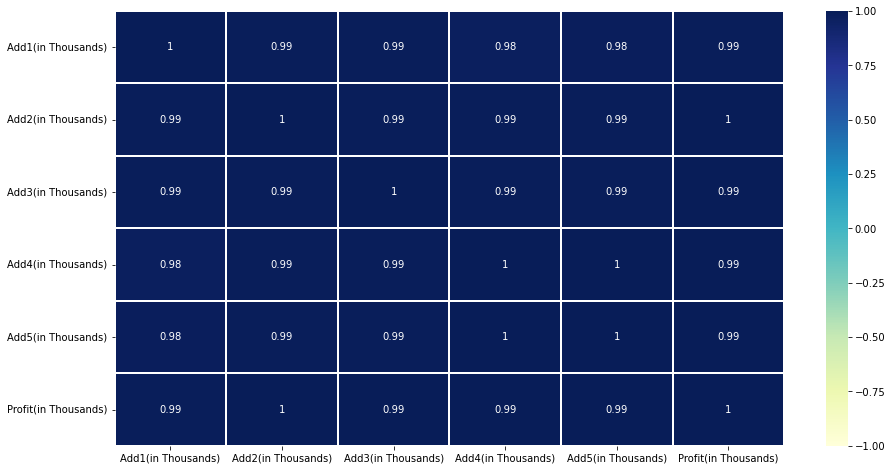

In [10]:
crmtx=a.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(crmtx,vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap="YlGnBu")

##### Profit has a higher positive correlation with all 5 different ad companies

# 2. Build a regression model to predict the profit from the given data and comment your findings on it

In [112]:
from sklearn.linear_model import LinearRegression
x = data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y = data[['Profit(in Thousands)']]
model = LinearRegression().fit(x,y)

In [113]:
model.score(x,y)

1.0

In [99]:
r=model.coef_

In [100]:
r

array([[ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ]])

In [101]:
l = model.predict(x)

In [102]:
q = pd.DataFrame(l)

In [72]:
q.rename(columns ={0:'Profit'},inplace = True)

In [73]:
q

,Profit
0,4093.065
1,4042.448
2,4213.819
3,4391.665
4,4350.683
...,...
200,5374.105
201,5439.655
202,5545.013
203,5565.444


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [120]:
predictedprofit= model.predict([[290,312,309,298,320]])

In [116]:
print('Predicted profit is',predictedprofit)

Predicted profit is [[5820.06]]
